# 2D Convolution and Pooling with Numpy and OpenCV

**Resources:**
* https://medium.com/analytics-vidhya/2d-convolution-using-python-numpy-43442ff5f381
* https://numbersmithy.com/2d-and-3d-pooling-using-numpy/
* https://stackoverflow.com/questions/54962004/implement-max-mean-poolingwith-stride-with-numpy/54966908

In [1]:
!pip install --upgrade opencv-python

In [2]:
import cv2            # to preprocess the image
import numpy as np    # to implement convolution

In [3]:
'''
To get the best results with a 2D convolution, 
recommended that you process the image in grayscale.
To do this cv2.cvtColor() function used.
# code: parameter in cvtColor() function is COLOR_BGR2GRAY

default mode in OpenCV is BGR (Blue, Green, Red) and not RGB
'''

# image parameter is image file name
def GrayScaledImage(image):
    image = cv2.imread(image)
    image = cv2.cvtColor(src = image, code = cv2.COLOR_BGR2GRAY)
    return image

## 2D Convolution

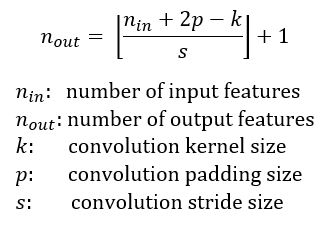

In [4]:
def convolve2D(image, kernel, padding = 0, strides = 1):
    # cross correlation
    # flip the matrix horizontally then vertically
    # it can be done with numpy
    kernel = np.flipud(np.fliplr(kernel))
    
    # gather kernel and image sizes
    x_KernelShape = kernel.shape[0]
    y_KernelShape = kernel.shape[1]
    x_ImageShape = image.shape[0]
    y_ImageShape = image.shape[1]
    
    # compute the matrix size of outputted image with formula
    # the formula: nOut = ((nIn + 2*p - k) / s) + 1
    x_output = int(((x_ImageShape + 2*padding - x_KernelShape) / strides) + 1)
    y_output = int(((y_ImageShape + 2*padding - y_KernelShape) / strides) + 1)
    
    # create new matrix with the deduced dimensions
    output = np.zeros((x_output, y_output))
    
    # if padding is greater than 0 then create paddedImage
    if padding != 0:
        paddedImage = np.zeros((image.shape[0] + 2 * padding, image.shape[1] + 2 * padding))
    
        # replace the actual image with the paddedImage
        # the original image will be in the middle of the paddedImage
        paddedImage[int(padding) : int((-1) * padding), int(padding) : int((-1) * padding)] = image
    else:
        # if there is no padding then paddedImage will be actual image
        paddedImage = image
        
    # iterate through the image
    # apply elementwise multiplication and sum it
    # and set it equal to the respective element in the output array.
    for y in range(image.shape[1]):
        # allows us to check if we are at the end of the image in the y direction
        # it will exit the complete convolution once we to reach the very bottom right of the image matrix
        if y > image.shape[1] - y_KernelShape:
            break
        
        # this will make sure the step size is equivalent to the specified stride amount
        if y % strides == 0:
            for x in range(image.shape[0]):
                # if the kernel is at the very right of the image. If it is break the loop
                if x > image.shape[0] - x_KernelShape:
                    break
                
                # main convolution operation
                # sum the element and append it to the output matrix
                try:
                    if x % strides == 0:
                        output[x, y] = (kernel * paddedImage[x : x + x_KernelShape, y : y + y_KernelShape]).sum()
                except:
                    break
    
    return output            
    

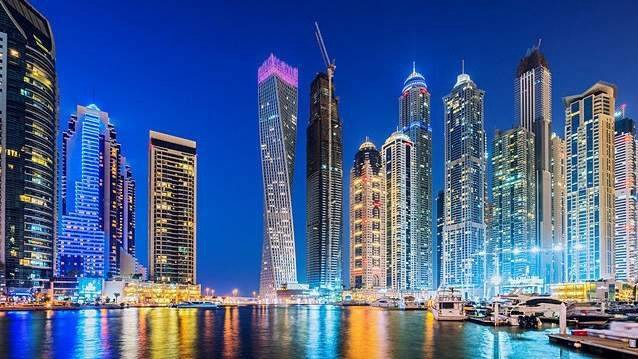

In [5]:
from IPython.display import Image
Image('image.jpg')

In [6]:
image = GrayScaledImage('image.jpg')
cv2.imwrite('GrayScaledImage.jpg', image)

True

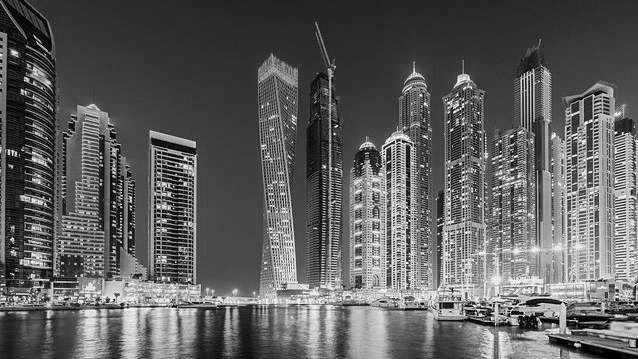

In [7]:
Image('GrayScaledImage.jpg')

In [8]:
# Edge Detection Kernel
kernel = np.array([[-1, -1, -1], 
                  [-1, 8, -1], 
                  [-1, -1, -1]])

# Convolve output image
output = convolve2D(image, kernel, padding = 2)
cv2.imwrite('2DConvolvedImage.jpg', output)

True

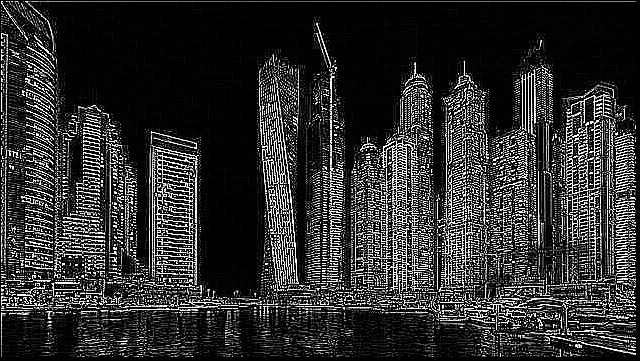

In [9]:
Image('2DConvolvedImage.jpg')

## Pooling

Like convolution, the pooling operation also involves an input image (or input data cube), and a pooling kernel (or filter)
There are typically 2 types of pooling layers in CNN
1. **max-pooling**: the maximum value in each pooling windows is taken as the pooling result.
2. **average-pooling**: the average value in each pooling window is taken as the pooling result.


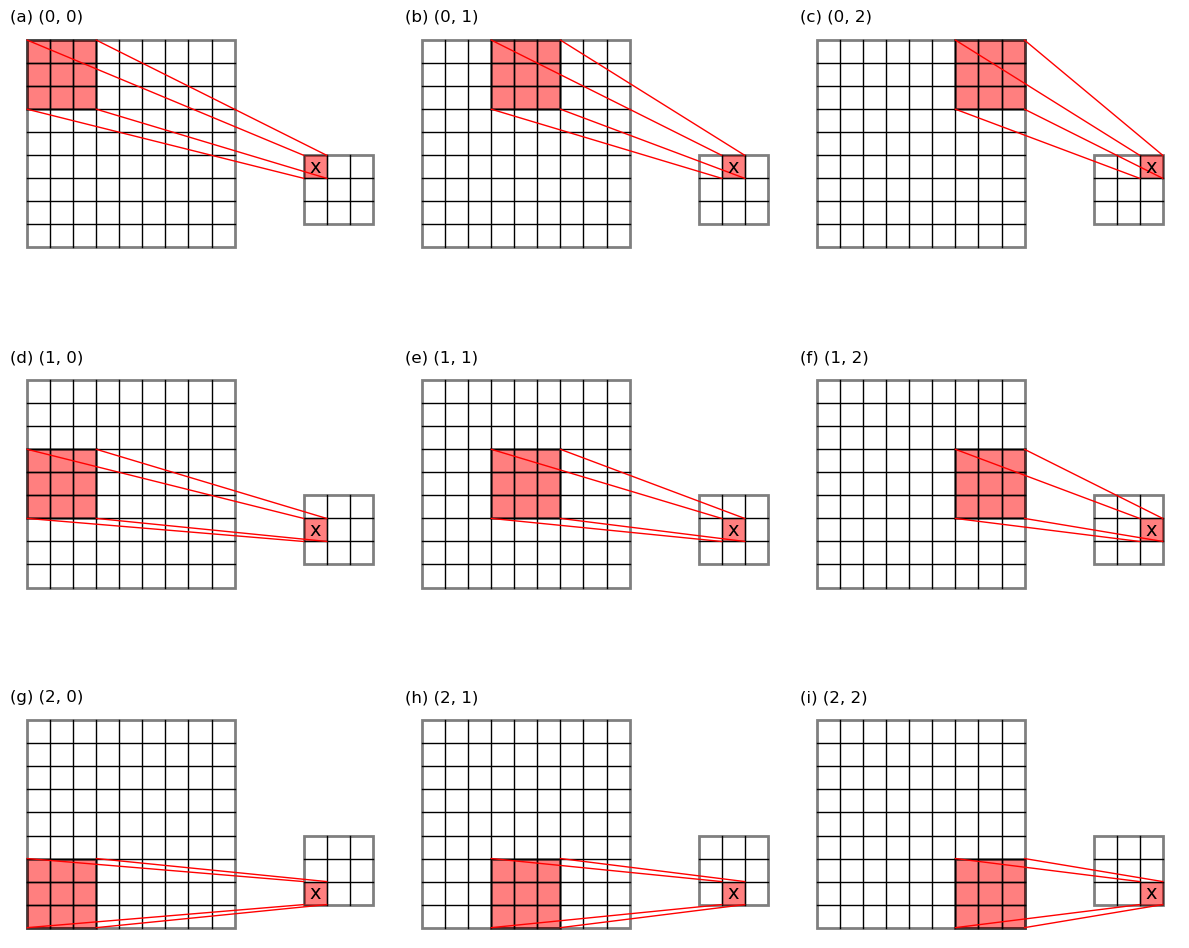

 * ho=[(hi–f)/s]+1, the output height.
 * wo=[(wi–f)/s]+1, the output width.
 * co=ci, the output depth.
 * [] is the floor function

In [10]:
from numpy.lib.stride_tricks import as_strided
def pool2D(A, kernel_size, stride, padding, pool_mode='max'):
    '''
    2D Pooling

    Parameters:
        A: input 2D array
        kernel_size: int, the size of the window
        stride: int, the stride of the window
        padding: int, implicit zero paddings on both sides of the input
        pool_mode: string, 'max' or 'avg'
    '''

    # Padding
    # if padding is greater than 0 then create paddedImage
    #if padding != 0:
     #   paddedImage = np.zeros((image.shape[0] + 2 * padding, image.shape[1] + 2 * padding))
    A = np.pad(A, padding, mode='constant')

    # Window view of A
    output_shape = ((A.shape[0] - kernel_size)//stride + 1,
                    (A.shape[1] - kernel_size)//stride + 1)
    
    kernel_size = (kernel_size, kernel_size)
    
    A_w = as_strided(A, shape = output_shape + kernel_size, 
                        strides = (stride*A.strides[0],
                                   stride*A.strides[1]) + A.strides)
    A_w = A_w.reshape(-1, *kernel_size)

    # Return the result of pooling
    if pool_mode == 'max':
        return A_w.max(axis = (1,2)).reshape(output_shape)
    elif pool_mode == 'avg':
        return A_w.mean(axis = (1,2)).reshape(output_shape)

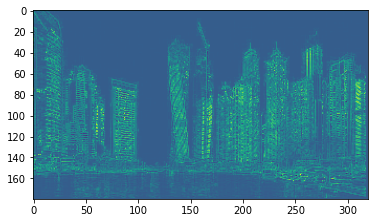

In [11]:
pool = pool2D(output, kernel_size = 2, stride = 2, padding = 0, pool_mode = 'max')

import matplotlib.pyplot as plt
plt.imshow(pool)

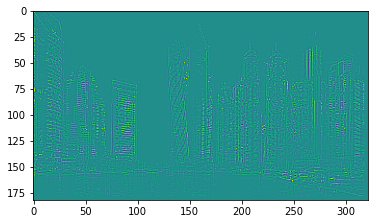

In [12]:
output = convolve2D(pool, kernel, padding = 2)
plt.imshow(output)

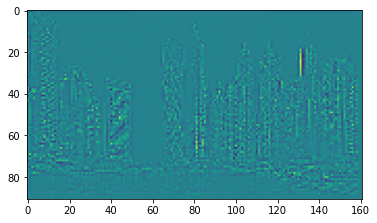

In [13]:
pool = pool2D(output, kernel_size = 2, stride = 2, padding = 0, pool_mode = 'avg')
plt.imshow(pool)

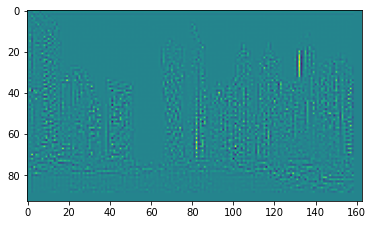

In [14]:
output = convolve2D(pool, kernel, padding = 2)
plt.imshow(output)

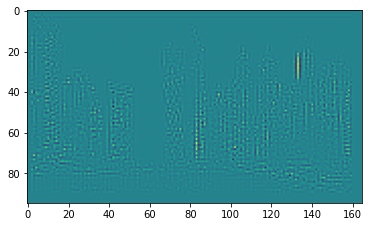

In [15]:
output = convolve2D(output, kernel, padding = 2)
plt.imshow(output)

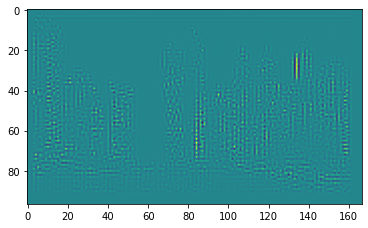

In [16]:
output = convolve2D(output, kernel, padding = 2)
plt.imshow(output)

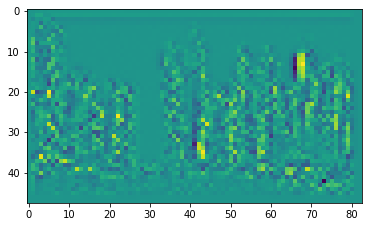

In [17]:
pool = pool2D(output, kernel_size = 2, stride = 2, padding = 0, pool_mode = 'avg')
plt.imshow(pool)